# Regularization and Grid Search
## CS5970:  Machine Learning Practice

In [1]:
import pandas as pd
import numpy as np
import os
import fnmatch
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV 

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from pandas import DataFrame
from matplotlib.colors import Colormap

##################
# Default parameters
FIGURESIZE=(12,6)
FONTSIZE=18

plt.rcParams['figure.figsize'] = FIGURESIZE
plt.rcParams['font.size'] = FONTSIZE

plt.rcParams['xtick.labelsize'] = FONTSIZE
plt.rcParams['ytick.labelsize'] = FONTSIZE

In [2]:
####################
# File loading
def read_bmi_file_set(directory, filebase):
    '''
    Read a set of CSV files and append them together
    :param directory: The directory in which to scan for the CSV files
    :param filebase: A file specification that potentially includes wildcards
    :returns: A list of Numpy arrays (one for each fold)
    '''
    
    # The set of files in the directory
    files = fnmatch.filter(os.listdir(directory), filebase)
    files.sort()

    # Create a list of Pandas objects; each object is from a file in the directory that matches filebase
    lst = [pd.read_csv(directory + "/" + file, delim_whitespace=True).values for file in files]
    
    # Concatenate the Pandas objects together.  ignore_index is critical here so that
    # the duplicate row indices are addressed
    return lst

In [3]:
####################
# File loading
def read_bmi_file_set(directory, filebase):
    '''
    Read a set of CSV files and append them together
    :param directory: The directory in which to scan for the CSV files
    :param filebase: A file specification that potentially includes wildcards
    :returns: A list of Numpy arrays (one for each fold)
    '''
    
    # The set of files in the directory
    files = fnmatch.filter(os.listdir(directory), filebase)
    files.sort()

    # Create a list of Pandas objects; each object is from a file in the directory that matches filebase
    lst = [pd.read_csv(directory + "/" + file, delim_whitespace=True).values for file in files]
    
    # Concatenate the Pandas objects together.  ignore_index is critical here so that
    # the duplicate row indices are addressed
    return lst

In [4]:
def my_eval(outs, pred):
    mse = np.sum(np.square(outs - pred)) / outs.shape[0]
    rmse = np.sqrt(mse)
    return mse, rmse, rmse * 180 / np.pi

In [5]:
# Loads all folds

dir_name = '../ml_practices/imports/datasets/bmi/DAT6_08'
MI_folds = read_bmi_file_set(dir_name, 'MI_fold*')
theta_folds = read_bmi_file_set(dir_name, 'theta_fold*')
dtheta_folds = read_bmi_file_set(dir_name, 'dtheta_fold*')
torque_folds = read_bmi_file_set(dir_name, 'torque_fold*')
time_folds = read_bmi_file_set(dir_name, 'time_fold*')

In [6]:
ins = MI_folds[0]
tm = time_folds[0]
outs_p = theta_folds[0]

## Grid Search

In [7]:
# Shoulder position
outs = outs_p[:,0]
ins = MI_folds[0]
tm = time_folds[0]

In [10]:
model = Ridge()

param_grid = [{'alpha': [1, 10, 100, 1000, 10000]}]

In [11]:
grid_search = GridSearchCV(model, param_grid, cv=20, scoring = 'neg_mean_squared_error')

In [12]:
grid_search.fit(ins, outs)

GridSearchCV(cv=20, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': [1, 10, 100, 1000, 10000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [13]:
grid_search.best_params_

{'alpha': 1000}

In [14]:
stats = grid_search.cv_results_

In [15]:
df = DataFrame(stats)

/home/fagg/python/env/tensorflow-cpu/lib/python3.5/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split14_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/fagg/python/env/tensorflow-cpu/lib/python3.5/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split15_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/fagg/python/env/tensorflow-cpu/lib/python3.5/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **

In [16]:
df

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split10_test_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.119149,0.003621,-0.063572,-0.001632,1,{'alpha': 1},5,-0.073231,-0.001558,-0.042204,...,-0.093975,-0.001590,-0.053629,-0.001699,-0.051552,-0.001690,0.033207,0.005783,0.016990,0.000098
1,0.128945,0.006516,-0.037050,-0.002086,10,{'alpha': 10},4,-0.035209,-0.002065,-0.010906,...,-0.056283,-0.002042,-0.039774,-0.002104,-0.031110,-0.002156,0.040701,0.008830,0.013649,0.000118
2,0.122596,0.006143,-0.021706,-0.003730,100,{'alpha': 100},2,-0.016743,-0.003782,-0.005307,...,-0.032840,-0.003635,-0.026691,-0.003602,-0.025175,-0.003781,0.033471,0.009410,0.010993,0.000184
3,0.121438,0.002761,-0.018390,-0.009037,1000,{'alpha': 1000},1,-0.011744,-0.009162,-0.008086,...,-0.025331,-0.008888,-0.017335,-0.008935,-0.028552,-0.008834,0.032701,0.005213,0.012920,0.000298
4,0.136945,0.003036,-0.027176,-0.022823,10000,{'alpha': 10000},3,-0.021245,-0.023113,-0.014134,...,-0.040151,-0.022518,-0.025831,-0.022941,-0.046310,-0.022317,0.042528,0.004710,0.017795,0.000679


In [17]:
scores = np.sqrt(-stats["mean_test_score"])

In [18]:
scores

array([0.2521343 , 0.19248304, 0.14733004, 0.13561009, 0.16485232])

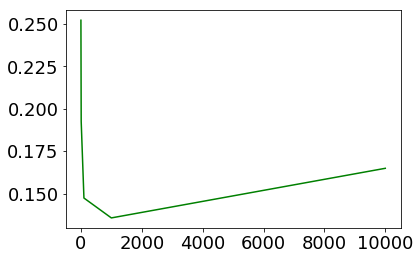

In [28]:
alphas = stats["param_alpha"].data

plt.figure()
plt.plot(alphas, scores, 'g')

## More focused search

In [38]:
base = 2
steps = 20
bottom = math.log(100, base)
top = math.log(2000, base)
exps = np.arange(bottom, top, (top-bottom)/steps)
alphas = [np.power(base, ex) for ex in exps]

In [39]:
alphas

[100.00000000000004,
 116.15863496415427,
 134.9282847673564,
 156.730853766308,
 182.05642030260807,
 211.47425268811287,
 245.64560522315816,
 285.33858187665567,
 331.4454017339988,
 385.0024543056701,
 447.213595499958,
 519.4772079068655,
 603.4176336545164,
 700.9216863860871,
 814.1810630738088,
 945.7416090031759,
 1098.5605433061178,
 1276.0729313591828,
 1482.2688982138955,
 1721.7833186634696]

In [40]:
model = Ridge()
param_grid = [{'alpha': alphas}]
grid_search = GridSearchCV(model, param_grid, cv=20,
                          scoring='neg_mean_squared_error',
                          n_jobs=5)
grid_search.fit(ins, outs)

GridSearchCV(cv=20, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=5,
       param_grid=[{'alpha': [100.00000000000004, 116.15863496415427, 134.9282847673564, 156.730853766308, 182.05642030260807, 211.47425268811287, 245.64560522315816, 285.33858187665567, 331.4454017339988, 385.0024543056701, 447.213595499958, 519.4772079068655, 603.4176336545164, 700.9216863860871, 814.1810630738088, 945.7416090031759, 1098.5605433061178, 1276.0729313591828, 1482.2688982138955, 1721.7833186634696]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [41]:
stats = grid_search.cv_results_
scores = np.sqrt(-stats["mean_test_score"])

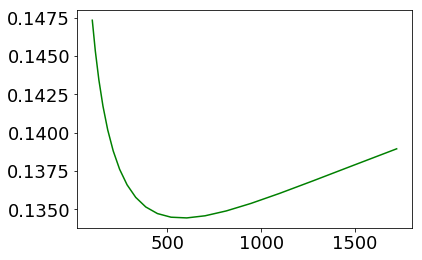

In [43]:
fig = plt.figure()
plt.plot(alphas, scores, 'g')
ax = fig.axes[0]
#ax.set_xscale('log')

## Grid Search with Elastic Net

In [89]:
base = 2
steps = 20
bottom = -10
top = math.log(2, base)
exps = np.arange(bottom, top, (top-bottom)/steps)
alphas = [np.power(base, ex) for ex in exps]

In [90]:
l1_ratios = np.arange(0.1, 1, .1)

In [91]:
alphas

[0.0009765625,
 0.0014297711874469005,
 0.0020933075440161997,
 0.003064781632409187,
 0.004487102949207177,
 0.006569503244169661,
 0.009618315729257186,
 0.01408203847829427,
 0.020617311105826555,
 0.030185510278901557,
 0.04419417382415944,
 0.06470405774008645,
 0.09473228540690044,
 0.13869618400848152,
 0.20306309908906028,
 0.2973017787506825,
 0.4352752816480655,
 0.6372803136596364,
 0.9330329915368157,
 1.3660402567544083]

In [50]:
l1_ratios

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [92]:
model = ElasticNet()
param_grid = [{'alpha': alphas, 'l1_ratio': l1_ratios}]
grid_search = GridSearchCV(model, param_grid, cv=20,
                          scoring='neg_mean_squared_error',
                          n_jobs=6)
grid_search.fit(ins, outs)

GridSearchCV(cv=20, error_score='raise-deprecating',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=6,
       param_grid=[{'alpha': [0.0009765625, 0.0014297711874469005, 0.0020933075440161997, 0.003064781632409187, 0.004487102949207177, 0.006569503244169661, 0.009618315729257186, 0.01408203847829427, 0.020617311105826555, 0.030185510278901557, 0.04419417382415944, 0.06470405774008645, 0.09473228540690044, 0...29915368157, 1.3660402567544083], 'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [93]:
grid_search.best_params_

{'alpha': 0.020617311105826555, 'l1_ratio': 0.1}

In [55]:
l1_ratios

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [66]:
alphas

[0.0001,
 0.00019952623149688788,
 0.0003981071705534969,
 0.0007943282347242806,
 0.0015848931924611108,
 0.003162277660168373,
 0.006309573444801917,
 0.012589254117941637,
 0.025118864315095718,
 0.05011872336272705,
 0.09999999999999959,
 0.19952623149688706,
 0.3981071705534953,
 0.7943282347242773,
 1.5848931924611045,
 3.16227766016836,
 6.309573444801892,
 12.589254117941584,
 25.118864315095617,
 50.11872336272684]

In [94]:
stats = grid_search.cv_results_
l1s = stats['param_l1_ratio'].data.reshape(len(alphas), len(l1_ratios))
als = stats['param_alpha'].data.reshape(len(alphas), len(l1_ratios))
rmses = np.sqrt(-stats["mean_test_score"]).reshape(len(alphas), len(l1_ratios))

In [76]:
rmses

array([[0.26411528, 0.25001718, 0.23887708, 0.22994041, 0.22255583,
        0.21648603, 0.21127847, 0.20659275, 0.20235883],
       [0.24717535, 0.22830467, 0.21546124, 0.20585177, 0.19813156,
        0.19199325, 0.18679215, 0.18258198, 0.17906187],
       [0.22530016, 0.20438533, 0.19116217, 0.18208341, 0.17552571,
        0.17038071, 0.16623802, 0.16302149, 0.16046266],
       [0.2017383 , 0.18108492, 0.16989032, 0.16274906, 0.15833974,
        0.1554649 , 0.15311441, 0.15122257, 0.14945652],
       [0.17924167, 0.16218885, 0.15519072, 0.15105715, 0.14766011,
        0.1447704 , 0.14287076, 0.1417288 , 0.14103418],
       [0.16115043, 0.15070349, 0.14459068, 0.14160712, 0.14039534,
        0.13985411, 0.13972397, 0.13971469, 0.14004602],
       [0.15001557, 0.14135811, 0.13979177, 0.13975284, 0.14085417,
        0.14326917, 0.14608257, 0.1487643 , 0.15121528],
       [0.1409168 , 0.13983647, 0.14334207, 0.14876836, 0.15346628,
        0.15730415, 0.16025084, 0.16252881, 0.16446421],


Text(0, 0.5, 'Alpha')

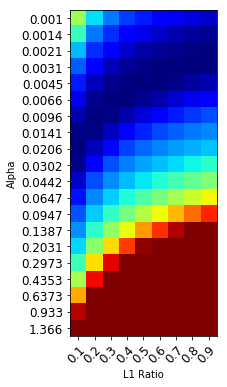

In [95]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(rmses, cmap="jet")
ax.set_xticks(np.arange(len(l1_ratios)))
ax.set_yticks(np.arange(len(alphas)))
ax.set_xticklabels(np.around(l1_ratios, 4), fontsize=12)
ax.set_yticklabels(np.around(alphas, 4), fontsize=12)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
plt.xlabel('L1 Ratio')
plt.ylabel('Alpha')